# Task-2: Prediction using Unsupervised ML

# Name: SAJIA

# IDE: Jupyter Notebook

# Language: Python3

# Importing libraries:

In [56]:
from sklearn.cluster import KMeans
import pandas as pd  #Pandas for analysing the data
import seaborn as sns # for visualize data
from matplotlib import pyplot as plt   #graphical content
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

# Load the iris dataset

In [57]:
df = pd.read_csv('Iris.csv')  #to load dataset we use pd which is pandas.
df.drop(['Id'],axis=1,inplace=True)

# Reading the dataset

In [58]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
df.head() #display the first 5 dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.shape  #to check how many columns and rows are there

(150, 5)

In [61]:
df.info() 
#to get the information of dataset such as what are the datatype , whether the value are null or not null
#this give us no. of rows and non null values. each colum has 150 non null means no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe() #give us count,mean,std etc.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.isnull().sum()  #checking null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
df.drop_duplicates(inplace=True) #to remove the duplicates
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

# PetalLengthCm vs PetalWidthCm 

# we'll compare our final plot with this graph to check how accurate our model is

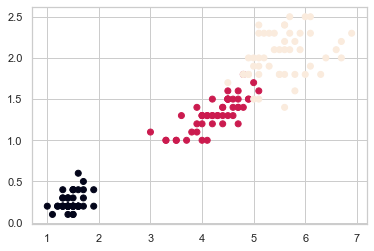

In [66]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

In [67]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


# Data Visualization for correlation

<AxesSubplot:>

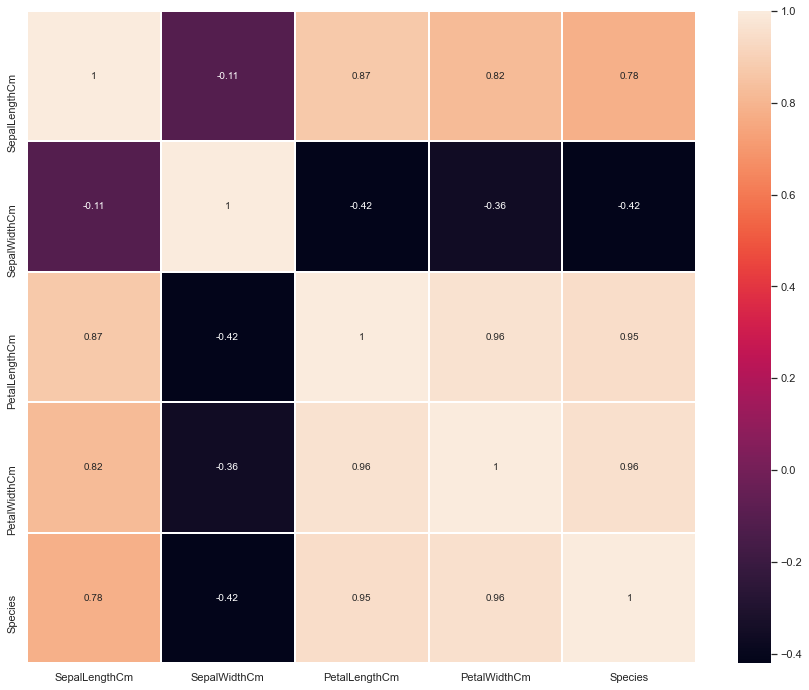

In [68]:
fig=plt.figure(figsize=(15,12))   #I have plotted correlation metrics as a heat map also
sns.heatmap(df.corr(),linewidths=1,annot=True)

# Visulaization using scatterplot for each pairing of the variables and histplot for the marginal plots along the diagonal

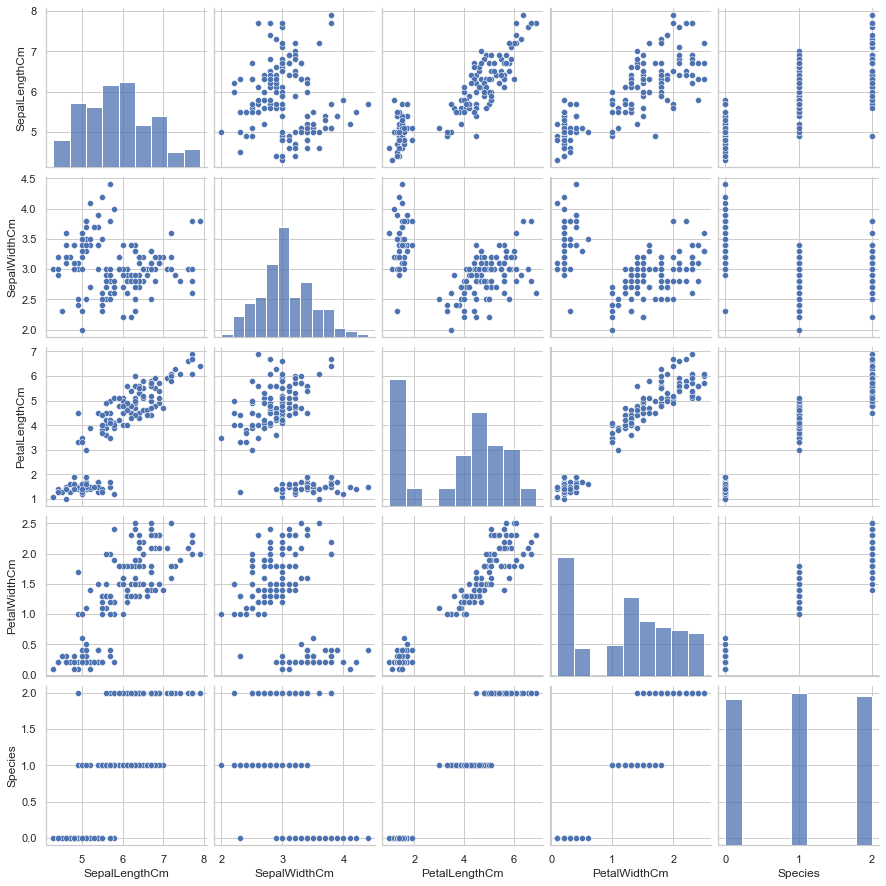

In [69]:
sns.pairplot(df)

In [70]:
df=df.iloc[:,[0,1,2,3]].values

# Elbow Method using within-cluster-sum-of-squares(wcss)
# K-means clustering

In [71]:
from sklearn.cluster import KMeans #imported the k means from sklearn
wcss = []
for i in range(1,11):   #for range 1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#wehave intialize the k mean cluster for each value of i
    kmeans.fit(df)
# inertia method returns wcc for that model
    wcss.append(kmeans.inertia_)  #and we have appended this list with k means.inertia
    
wcss

#so now we are going to plot this inertia for diff. value of i(which is no. of clusters)

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.38097880813144,
 34.11707094757095,
 29.75801580972634,
 27.744997920380285,
 25.76965268228504]

# Using Elbow graph to find optimum no. of clusters

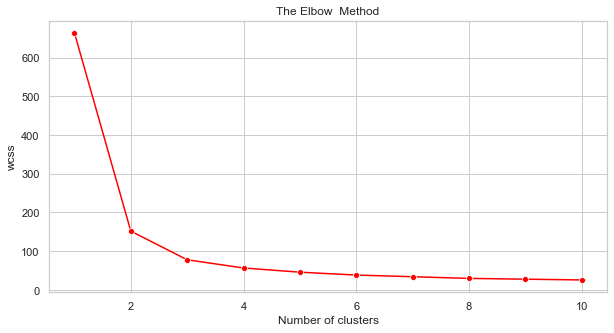

In [72]:
#this elbow method says that whenever we get the bend like elbow that is our optimum no. of cluster


plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow  Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#  Initialization using K-means++
 

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

# Visualizing the clusters

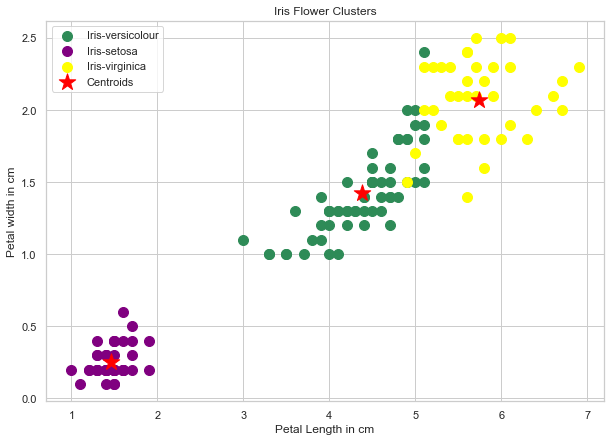

In [74]:
fig = plt.figure(figsize=(10,7))
plt.title('Clusters with Centroids', fontweight = 'bold', fontsize = 20)
plt.scatter(df[y_kmeans ==0,2], df[y_kmeans == 0,3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans ==1,2], df[y_kmeans == 1,3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2,2], df[y_kmeans == 2,3], s =100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red', marker='*', label='Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

# Task-2 
 
 
# COMPLETED